# Esercizio 8.1/8.2

Nella prima parte dell'esercizio si richiede di scrivere un codice Montecarlo per una particella quantistica in una dimensione; attraverso l'algoritmo di Metropolis bisogna simulare la funzione d'onda e ricavare il valor medio dell'Hamiltoniana.
Il potenziale a cui è sottoposta la particella è il seguente:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

La forma della funzione d'onda è stata presa come una somma di gaussiane:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Per trovare il valor medio minimo dell'Hamiltoniana si fanno variare i parametri $\mu$ e $\sigma$.
Per trovare i parametri che minimizzino l'energia si è utilizzato un piccolo codice che esplora i valori di $\mu$ e $\sigma$ tra 0 e 1. I valori trovati sono: $\sigma$= 0.65 e $\mu$= 0.70.
Una volta trovati i parametri adatti i risultati del campionamento dell'algoritmo di Metropolis vengono mostrati in un istogramma e confrontati con la soluzione analitica.
Il primo grafico invece mostra i risultati del valor medio minimo dell'Hamiltoniana  $\langle {\hat H} \rangle_T$.
Dal secondo grafico possiamo notare che il risultato approssima abbastanza bene la soluzione analitica ma non è molto precisa.






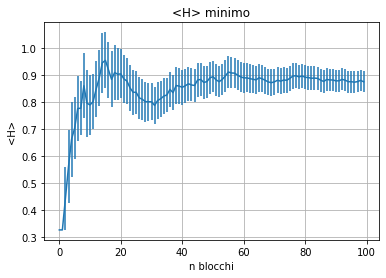

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

x=np.arange(100)
H_medio=np.loadtxt("min_<H>") 
plt.errorbar(x,H_medio[:,0],H_medio[:,1])
plt.xlabel("n blocchi")
plt.ylabel("<H>")
plt.title("<H> minimo")
plt.grid(True)
plt.show()

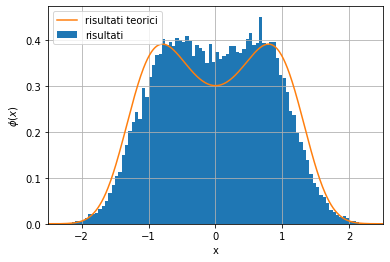

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math as mt


posizioni=np.loadtxt("posizioni.dat")
#fig = plt.figure(figsize=(12.8,9.6))
plt.hist(posizioni, bins=100, range=(-2.5, 2.5), density=True, stacked=True, label= "risultati")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
plt.plot(x,((psi[0])**2), label="risultati teorici")
plt.xlabel("x")
plt.ylabel("$\phi(x)$")
plt.legend()
plt.grid(True)
plt.xlim((-2.5,2.5))
plt.show()